<a href="https://colab.research.google.com/github/KadjelRamkisoen/BertIR/blob/main_kate/BertIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Path to data files
IR_Path = '/content/drive/MyDrive/UvAntwerpen/2021-2022/Information Retrieval/Assignment 2/'
# IR_Path = '/content/drive/MyDrive/Information Retrieval/Assignment 2/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dev_data = 'dev_data.csv'
all_docs = 'all_docs.csv'
dev_queries = 'dev_queries.csv'
test_data = 'test_data.csv'
training_data = 'training_data.csv'
lucene_data = 'raw_dev_Lucene_retrievals.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(IR_Path + dev_data)
df = pd.read_csv(IR_Path + all_docs)
df = pd.read_csv(IR_Path + dev_queries)
df = pd.read_csv(IR_Path + test_data)
df = pd.read_csv(IR_Path + training_data)
df = pd.read_csv(IR_Path + lucene_data)

In [ ]:
df.head()

,Query_number,doc_number,Query,doc_text,label
0,1089071,432658,va death benefits contact number,Veteran Benefits in Nebraska Ads You May Be In...,1
1,1089071,417115,va death benefits contact number,Home › Benefit Library › State / Territory Ben...,1
2,1089071,429474,va death benefits contact number,"VA Burial Benefits Burial Allowances Burial, H...",1
3,1089071,122086,va death benefits contact number,Home › Benefit Library › Federal Benefits › Bu...,1
4,1089071,60461,va death benefits contact number,Call Today1-844-VET-LAWS (838-5297)REFER A FRI...,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

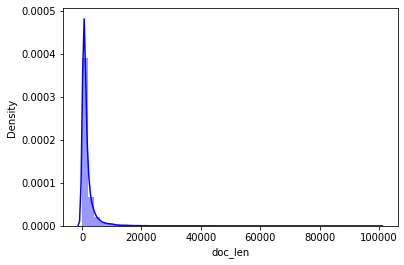

In [ ]:
df['doc_len'] = df['doc_text'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()